In [4]:
#Get data from the site 
from bs4 import BeautifulSoup as bs
from pprint import pprint
import requests
import os

html = requests.get('http://www.progarchives.com/top-prog-albums.asp?salbumtypes=1')

soup = bs(html.text, 'html.parser')

data1 = soup.find('table', {'cellspacing': 0})

data2 = data1.findAll('tr')

data3 = data2[0].findAll('td')

chart = []

for tables in data2:
    album = []
    
    strongs = tables.findAll('strong')
    for ones in strongs:
        album.append(ones.get_text())
        
    score = tables.find('span')
    album.append(score.get_text())
    
    year = tables.findAll('br')
    for ones in year:
        thing = ones.get_text()
        if thing != '':
            album.append(thing)
            
    s = tables.findAll('a')
    for ones in s:
        album.append(ones.get_text())
        
    chart.append(album)

In [5]:
#Clean Data
full_chart =[]
for album in chart:
    album2 = album[:5]
    album2.append(album[6])
    year = album[4][8:]
    album2.pop(4)
    album2.append(year)
    th = 0
    for i in range(2):
        if i == 1:
            i = 5
        num = int(album2[i])
        album2[i] = num
    num = float(album2[3])
    album2[3] = num
    full_chart.append(album2)

In [6]:
#Chart as DataFrame
import pandas as pd
df = pd.DataFrame(full_chart)
col = ["Rank", "Title", "Genre", "Rating", "Artist", "Year"]
df.columns = col
df.index = pd.RangeIndex(1, 101, 1)
df

,Rank,Title,Genre,Rating,Artist,Year
1,1,Close to the Edge,Symphonic Prog,4.67,Yes,1972
2,2,Selling England by the Pound,Symphonic Prog,4.64,Genesis,1973
3,3,Wish You Were Here,Psychedelic/Space Rock,4.63,Pink Floyd,1975
4,4,In the Court of the Crimson King,Eclectic Prog,4.63,King Crimson,1969
5,5,Thick as a Brick,Prog Folk,4.63,Jethro Tull,1972
...,...,...,...,...,...,...
96,96,Operation: Mindcrime,Progressive Metal,4.22,Queensrÿche,1988
97,97,Ys,Rock Progressivo Italiano,4.24,Il Balletto Di Bronzo,1972
98,98,Lateralus,Experimental/Post Metal,4.21,Tool,2001
99,99,Doomsday Afternoon,Crossover Prog,4.22,Phideaux,2007


In [7]:
#Display all rows
pd.set_option('display.max_rows', None)
artist_cl = df.sort_values(by='Artist', ascending = True)

In [8]:
artist_cl

,Rank,Title,Genre,Rating,Artist,Year
92,92,Elegant Gypsy,Jazz Rock/Fusion,4.24,Al DiMeola,1977
60,60,A Drop Of Light,Symphonic Prog,4.32,All Traps On Earth,2018
74,74,Arbeit Macht Frei,Rock Progressivo Italiano,4.27,Area,1973
58,58,Depois do Fim,Symphonic Prog,4.29,Bacamarte,1983
21,21,Darwin!,Rock Progressivo Italiano,4.38,Banco Del Mutuo Soccorso,1972
59,59,Banco Del Mutuo Soccorso,Rock Progressivo Italiano,4.29,Banco Del Mutuo Soccorso,1972
24,24,Io Sono Nato Libero,Rock Progressivo Italiano,4.37,Banco Del Mutuo Soccorso,1973
81,81,Spectrum,Jazz Rock/Fusion,4.27,Billy Cobham,1973
93,93,Anabelas,Eclectic Prog,4.25,Bubu,1978
39,39,The Snow Goose,Symphonic Prog,4.30,Camel,1975


In [9]:
#Count albums by artist and order 
albums_by_artist = df.groupby(['Artist']).size().sort_values(ascending = False)
albums_by_artist

Artist
Genesis                            5
Gentle Giant                       5
Rush                               4
Yes                                4
Pink Floyd                         4
Van Der Graaf Generator            4
Banco Del Mutuo Soccorso           3
King Crimson                       3
Miles Davis                        3
Camel                              3
Frank Zappa                        3
Opeth                              3
Magma                              2
Mahavishnu Orchestra               2
Marillion                          2
Pain Of Salvation                  2
Jethro Tull                        2
Änglagård                          2
Dream Theater                      2
Porcupine Tree                     2
Wobbler                            2
Premiata Forneria Marconi (PFM)    2
Caravan                            2
Riverside                          2
Steven Wilson                      2
Emerson Lake & Palmer              1
Area                           

In [10]:
#sort artist that has more than one album
modified = albums_by_artist.reset_index()
modified = modified[:25]
album_num_artist = modified['Artist'].tolist()
album_num = modified[0].tolist()

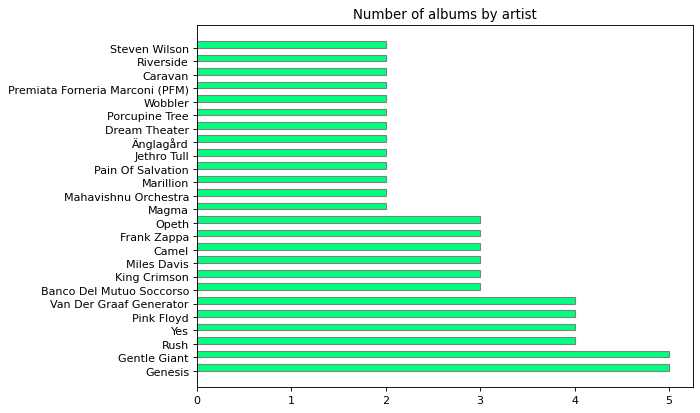

In [11]:
#draw chart
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.barh(album_num_artist, album_num, height=0.5, align='edge', color="springgreen",
        edgecolor="gray", linewidth=1, log=False)
plt.title("Number of albums by artist")
plt.show()

In [33]:
#average rating by artist
rating_mean = df.groupby('Artist').mean().sort_values('Rating', ascending = False)
modified = rating_mean.reset_index()
modified = modified.loc[modified['Artist'].isin(album_num_artist)]
rating_avg = modified['Rating'].tolist()
rating_art = modified['Artist'].tolist()

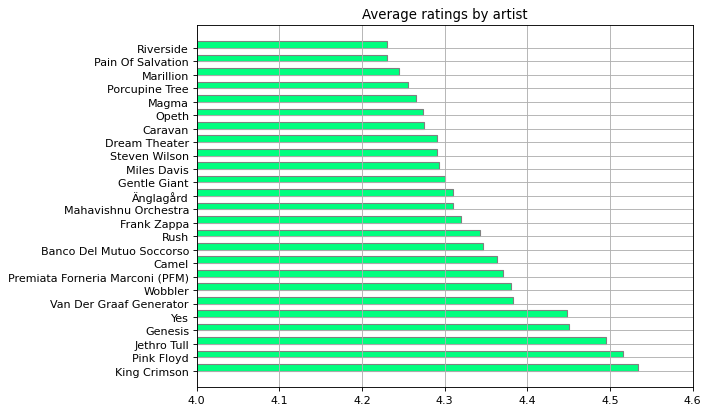

In [35]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.barh(rating_art, rating_avg, height=0.5, align='edge', color="springgreen",
        edgecolor="gray", linewidth=1, log=False)
plt.title("Average ratings by artist")
# plt.xticks(np.arange(4.5,0.1))
plt.xlim(4,4.6)
plt.grid()
plt.show()

In [16]:
#Sort by Genre
pd.set_option('display.max_rows', None)
genre_cl = df.sort_values(by='Genre', ascending = True)
genre_cl

,Rank,Title,Genre,Rating,Artist,Year
80,80,Radio Gnome Invisible Vol. 3 - You,Canterbury Scene,4.25,Gong,1974
79,79,"If I Could Do It All Over Again, I'd Do It All...",Canterbury Scene,4.25,Caravan,1970
66,66,Hatfield and the North,Canterbury Scene,4.28,Hatfield And The North,1974
43,43,In the Land of Grey and Pink,Canterbury Scene,4.30,Caravan,1971
63,63,Rock Bottom,Canterbury Scene,4.28,Robert Wyatt,1974
94,94,Of Queues And Cures,Canterbury Scene,4.26,National Health,1978
73,73,Space Shanty,Canterbury Scene,4.27,Khan,1972
42,42,Hand. Cannot. Erase.,Crossover Prog,4.30,Steven Wilson,2015
47,47,Ommadawn,Crossover Prog,4.30,Mike Oldfield,1975
99,99,Doomsday Afternoon,Crossover Prog,4.22,Phideaux,2007


In [17]:
#count albums by genre
albums_by_genre = df.groupby(['Genre']).size().sort_values(ascending = False)
albums_by_genre

Genre
Symphonic Prog               21
Eclectic Prog                15
Rock Progressivo Italiano    10
Jazz Rock/Fusion              9
Progressive Metal             7
Canterbury Scene              7
Heavy Prog                    6
Crossover Prog                5
Psychedelic/Space Rock        4
Tech/Extreme Prog Metal       3
RIO/Avant-Prog                3
Prog Folk                     3
Neo-Prog                      3
Zeuhl                         2
Progressive Electronic        1
Experimental/Post Metal       1
dtype: int64

In [20]:
abg = albums_by_genre.reset_index()
hey = abg.loc[modified['Artist'].isin(album_num_artist)]
genre = hey['Genre'].tolist()
genre_num = hey[0].tolist()
genre = genre[:9]
genre_num = genre_num[:9]

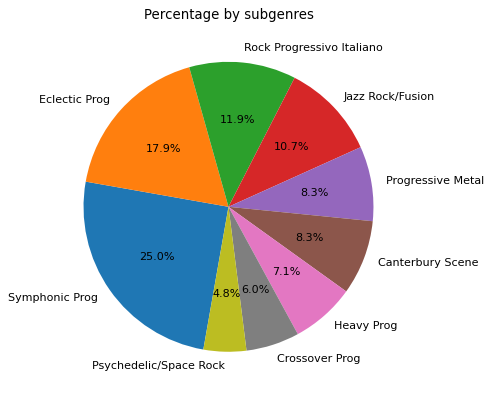

In [21]:
#draw chart 
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.pie(genre_num, labels=genre, autopct='%.1f%%', startangle=260, counterclock=False)
plt.title("Percentage by subgenres")
plt.show()

In [36]:
#artist genre
artist_cl2 = artist_cl.loc[:, ['Artist', 'Genre']]
modified = artist_cl2.drop_duplicates(subset=['Artist'])
modified = modified.groupby(['Genre']).size().sort_values(ascending = False)
modified

Genre
Symphonic Prog               10
Rock Progressivo Italiano     7
Jazz Rock/Fusion              6
Eclectic Prog                 6
Canterbury Scene              6
Progressive Metal             4
Crossover Prog                4
Prog Folk                     2
Neo-Prog                      2
Heavy Prog                    2
Zeuhl                         1
Tech/Extreme Prog Metal       1
RIO/Avant-Prog                1
Psychedelic/Space Rock        1
Progressive Electronic        1
Experimental/Post Metal       1
dtype: int64

In [23]:
#number of artist's genre
abg = modified.reset_index()
print(abg)
genre_artist = abg['Genre'].tolist()
genre_artist_num = abg[0].tolist()
genre_artist = genre_artist[:7]
genre_artist_num = genre_artist_num[:7]

                        Genre   0
0              Symphonic Prog  10
1   Rock Progressivo Italiano   7
2            Jazz Rock/Fusion   6
3               Eclectic Prog   6
4            Canterbury Scene   6
5           Progressive Metal   4
6              Crossover Prog   4
7                   Prog Folk   2
8                    Neo-Prog   2
9                  Heavy Prog   2
10                      Zeuhl   1
11    Tech/Extreme Prog Metal   1
12             RIO/Avant-Prog   1
13     Psychedelic/Space Rock   1
14     Progressive Electronic   1
15    Experimental/Post Metal   1


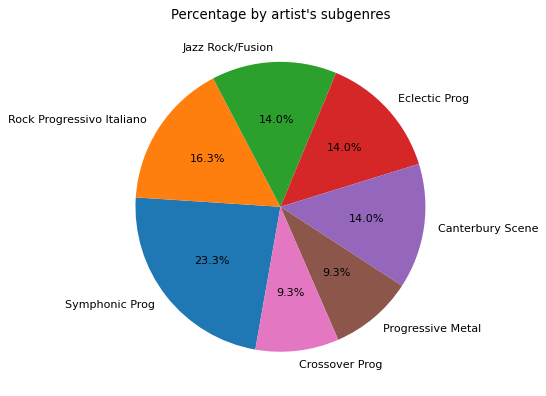

In [24]:
#draw chart 
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.pie(genre_artist_num, labels=genre_artist, autopct='%.1f%%', startangle=260, counterclock=False)
plt.title("Percentage by artist's subgenres")
plt.show()

In [25]:
#average rating by genre
genre_rating = genre_cl.groupby('Genre').mean().sort_values('Rating', ascending = False)
genre_rating = genre_rating.reset_index()
genre_rating = genre_rating.loc[genre_rating['Genre'].isin(genre)]
gr_genre = genre_rating['Genre'].tolist()
gr_rating = genre_rating['Rating'].tolist()

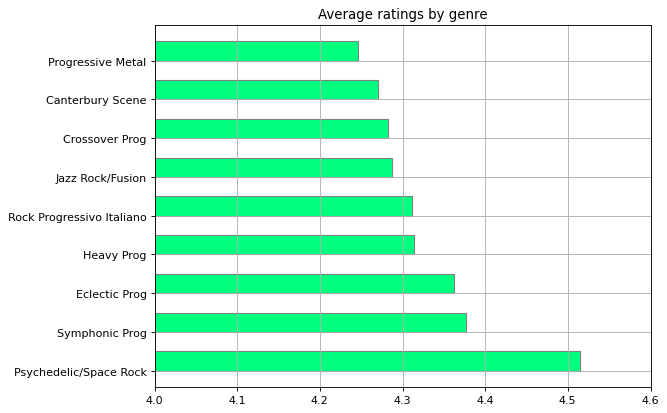

In [26]:
#draw chart
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.barh(gr_genre, gr_rating, height=0.5, align='edge', color="springgreen",
        edgecolor="gray", linewidth=1, log=False)
plt.title("Average ratings by genre")
plt.xlim(4,4.6)
plt.grid()
plt.show()

In [27]:
#make new column years
conditions = [
    (df['Year'] < 1970),
    (df['Year'] >= 1970) & (df['Year'] < 1980),
    (df['Year'] >= 1980) & (df['Year'] < 1990),
    (df['Year'] >= 1990) & (df['Year'] < 2000),
    (df['Year'] >= 2000)
    ]

# create a list of the values we want to assign for each condition
values = ['1960s', '1970s', '1980s', '1990s', '2000s']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Years'] = np.select(conditions, values)
df

,Rank,Title,Genre,Rating,Artist,Year,Years
1,1,Close to the Edge,Symphonic Prog,4.67,Yes,1972,1970s
2,2,Selling England by the Pound,Symphonic Prog,4.64,Genesis,1973,1970s
3,3,Wish You Were Here,Psychedelic/Space Rock,4.63,Pink Floyd,1975,1970s
4,4,In the Court of the Crimson King,Eclectic Prog,4.63,King Crimson,1969,1960s
5,5,Thick as a Brick,Prog Folk,4.63,Jethro Tull,1972,1970s
6,6,The Dark Side of the Moon,Psychedelic/Space Rock,4.61,Pink Floyd,1973,1970s
7,7,Foxtrot,Symphonic Prog,4.61,Genesis,1972,1970s
8,8,Red,Eclectic Prog,4.56,King Crimson,1974,1970s
9,9,Animals,Psychedelic/Space Rock,4.52,Pink Floyd,1977,1970s
10,10,Godbluff,Eclectic Prog,4.48,Van Der Graaf Generator,1975,1970s


In [28]:
#order by Years column
years_df = df.sort_values(by='Years', ascending = True)
years_df

,Rank,Title,Genre,Rating,Artist,Year,Years
71,71,In A Silent Way,Jazz Rock/Fusion,4.28,Miles Davis,1969,1960s
4,4,In the Court of the Crimson King,Eclectic Prog,4.63,King Crimson,1969,1960s
27,27,Kind of Blue,Jazz Rock/Fusion,4.35,Miles Davis,1959,1960s
28,28,Hot Rats,RIO/Avant-Prog,4.34,Frank Zappa,1969,1960s
64,64,Mekanïk Destruktïw Kommandöh,Zeuhl,4.28,Magma,1973,1970s
63,63,Rock Bottom,Canterbury Scene,4.28,Robert Wyatt,1974,1970s
62,62,The Inner Mounting Flame,Jazz Rock/Fusion,4.28,Mahavishnu Orchestra,1971,1970s
61,61,Acquiring The Taste,Eclectic Prog,4.27,Gentle Giant,1971,1970s
59,59,Banco Del Mutuo Soccorso,Rock Progressivo Italiano,4.29,Banco Del Mutuo Soccorso,1972,1970s
57,57,Free Hand,Eclectic Prog,4.28,Gentle Giant,1975,1970s


In [29]:
#count number of Years
years_by = years_df.groupby(['Years']).size().sort_values(ascending = False)
years_by

Years
1970s    68
2000s    18
1980s     6
1990s     4
1960s     4
dtype: int64

In [30]:
#make DataFrame to list
yb = years_by.reset_index()
year_list = yb['Years'].tolist()
year_list_num = yb[0].tolist()

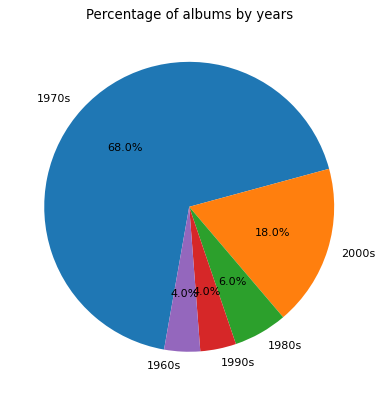

In [31]:
#draw chart
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.pie(year_list_num, labels=year_list, autopct='%.1f%%', startangle=260, counterclock=False)
plt.title("Percentage of albums by years")
plt.show()

In [81]:
years_genre = years_df.groupby(['Years', 'Genre']).size()
modified = years_genre.reset_index()
genre_by_years = modified[modified[0] > 2]
genre_by_years

,Years,Genre,0
3,1970s,Canterbury Scene,7
5,1970s,Eclectic Prog,14
7,1970s,Jazz Rock/Fusion,7
8,1970s,Prog Folk,3
10,1970s,Psychedelic/Space Rock,4
12,1970s,Rock Progressivo Italiano,10
13,1970s,Symphonic Prog,15
22,2000s,Crossover Prog,3
26,2000s,Progressive Metal,4
27,2000s,Symphonic Prog,4


In [57]:
gby_70s = genre_by_years[genre_by_years['Years'] == '1970s']
gby_00s = genre_by_years[genre_by_years['Years'] == '2000s']

In [60]:
gby_7_genre = gby_70s['Genre'].tolist()
gby_7_num = gby_70s[0].tolist()
gby_0_genre = gby_00s['Genre'].tolist()
gby_0_num = gby_00s[0].tolist()

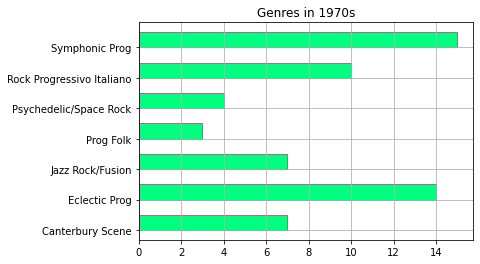

In [90]:
plt.barh(gby_7_genre, gby_7_num, height=0.5, align='edge', color="springgreen",
        edgecolor="gray", linewidth=1, log=False)
plt.title("Genres in 1970s")
plt.grid()
plt.show()

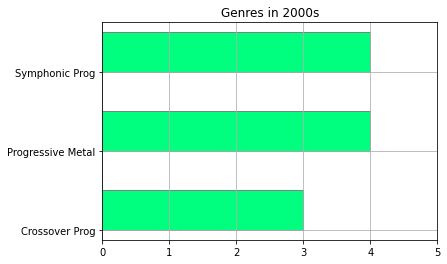

In [89]:
plt.barh(gby_0_genre, gby_0_num, height=0.5, align='edge', color="springgreen",
        edgecolor="gray", linewidth=1, log=False)
plt.title("Genres in 2000s")
plt.grid()
plt.xlim(0, 5, 1)
plt.show()

In [83]:
yg_modified = years_genre.reset_index()
yg_modified

,Years,Genre,0
0,1960s,Eclectic Prog,1
1,1960s,Jazz Rock/Fusion,2
2,1960s,RIO/Avant-Prog,1
3,1970s,Canterbury Scene,7
4,1970s,Crossover Prog,2
5,1970s,Eclectic Prog,14
6,1970s,Heavy Prog,2
7,1970s,Jazz Rock/Fusion,7
8,1970s,Prog Folk,3
9,1970s,Progressive Electronic,1


In [85]:
best_genre_60s = yg_modified[yg_modified['Years'] == '1960s'].nlargest(1, 0)
best_genre_70s = yg_modified[yg_modified['Years'] == '1970s'].nlargest(2, 0)
best_genre_80s = yg_modified[yg_modified['Years'] == '1980s'].nlargest(2, 0)
best_genre_90s = yg_modified[yg_modified['Years'] == '1990s'].nlargest(1, 0)
best_genre_00s = yg_modified[yg_modified['Years'] == '2000s'].nlargest(2, 0)

In [87]:
print(best_genre_60s, best_genre_70s, best_genre_80s, best_genre_90s, best_genre_00s)

   Years             Genre  0
1  1960s  Jazz Rock/Fusion  2     Years           Genre   0
13  1970s  Symphonic Prog  15
5   1970s   Eclectic Prog  14     Years       Genre  0
15  1980s  Heavy Prog  2
16  1980s    Neo-Prog  2     Years              Genre  0
19  1990s  Progressive Metal  2     Years              Genre  0
26  2000s  Progressive Metal  4
27  2000s     Symphonic Prog  4


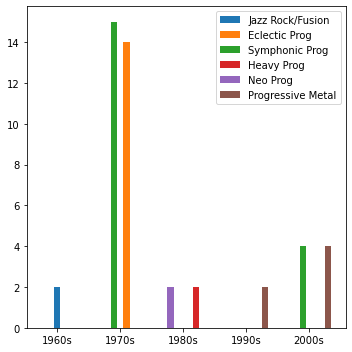

In [128]:
JRF = [2, 0, 0, 0, 0]
SP = [0, 15, 0, 0, 4]
EP = [0, 14, 0, 0, 0]
HP = [0, 0, 2, 0, 0]
NP = [0, 0, 2, 0, 0]
PM = [0, 0, 0, 2, 4]
labels = ['1960s', '1970s', '1980s', '1990s', '2000s']
fig = plt.figure(figsize=(5, 5))
X = np.arange(len(labels))
plt.bar(X, JRF, width = 0.1, label = "Jazz Rock/Fusion")
plt.bar(X + 0.1, EP,  width = 0.1, label = "Eclectic Prog")
plt.bar(X - 0.1, SP, width = 0.1, label = "Symphonic Prog")
plt.bar(X + 0.2, HP, width = 0.1, label = 'Heavy Prog')
plt.bar(X - 0.2, NP, width = 0.1, label = "Neo Prog")
plt.bar(X + 0.3, PM, width = 0.1, label = "Progressive Metal")
plt.legend()
plt.xticks(range(len(labels)), labels)
fig.tight_layout()

plt.show()